In [1]:
import numpy as np
import pandas as pd  
import seaborn as sns
# For importing the boston house dataset
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import scipy.stats as stats
# For building neural networks.
import keras as kr
# For encoding categorical variables.
import sklearn.preprocessing as pre
# For splitting into training and test sets.
import sklearn.model_selection as mod
# For whitening the inputs
import sklearn.decomposition as dec
# Set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 5.0)

Using TensorFlow backend.
C:\Users\montec3\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\montec3\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\montec3\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

# Description

- I take the dataset from sklearn package and show its description:

In [2]:
# Stored the dataset in a variable, DS -dataset-
DS = load_boston()
# Dataset characteristics:
print(DS.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

---
- Then there is 506 rows and 13 attributes other than the price median value (target). 
- This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.
- Now I create a pandas data frame to display the header of the table as a sample:

In [3]:
print('(#rows, #columns):', DS.data.shape) #shows count of rows and columns
bhp = pd.DataFrame(DS.data, columns=DS.feature_names) # bhp stands for Boston house prices
bhp.index += 1 #starting the index from 1 instead of 0 (first row is still indexed as 0)
bhp['MEDV'] = DS.target # Adding prices -MEDV- to the table
bhp.head() # .head() shows just the first five rows

(#rows, #columns): (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


For a first glance there is an option to describe all the attributes of the dataset individually and visualize their distribution by twos. That is what the code from the cell below shows, it is commented because it takes a lot of space and much information returned is not revealing. Following, I will summarise the main features of the dataset but if you are curious enough you may want to uncomment the block and rerun the cell. 

In [4]:
# # The pairplot function of seaborn draws scatterplots for joint relationships and histograms for univariate distributions
# sns.pairplot(bhp)
# plt.show()
# # shows count, mean, std, min, 25%, 50%, 75% and max of all attributes 
# bhp.describe().T # .describe() shows count, mean, std, min, 25%, 50%, 75% and max.T switches position of headers and first column just for a better fit of the table on the page

- Making sure that all the values are floats and check if any of them are missing:

In [5]:
bhp.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
bhp.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- All are floats and there is no missing values.
- The main atribute, which this notebook focuses on, is the price of the houses (__MEDV__, median value of the price in $1000's)


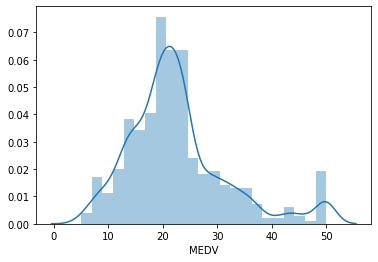

In [7]:
# Histogram of the price attribute
sns.distplot(bhp['MEDV']) # Passing the MEDV -price- column to the distplot() function of seaborn
plt.show()

- It shows a normal distribution where there is more data concentrated on the smaller value side (left) with an outstanding rise on the highest price side (right). This is no surprise since in general most population can not afford the most pricey houses.The figures show the same, 75% of the values are up to 25.00, which is near the mean (22.53)

In [8]:
# Data exploration
bhp['MEDV'].describe() # Description of the price -MEDV- column

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

- There is a <u>moderate to strong correlation</u> between price (__MEDV__) and number of rooms (__RM__). Note that this figure is displayed as 0.70 whereas the actual value is 0.695359947071539 since it was rounded when formatting floats to show only two decimal points (this affects the whole table with correlations above). This fact is meaningless in terms of interpretation.

In [9]:
bhp['RM'].corr(bhp['MEDV'])

0.695359947071539

Now I will plot it along with its regression line in red:

m = 9.1021; c = -34.6706


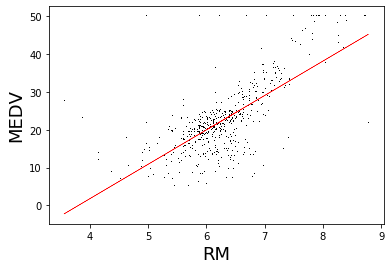

In [10]:
# plotting both variables with small black dots 
plt.plot(bhp['RM'],bhp['MEDV'], 'k,')
# getting the parameters from the regression line that best fit these pair of coordinates
m, c = np.polyfit(bhp['RM'], bhp['MEDV'], 1)
print('m = %.4f; c = %.4f' %(m,c)) # %.4f to show just 4 decimal points
# drawing the regression line in red
plt.plot(bhp['RM'], m * bhp['RM'] + c, 'r', linewidth=0.5)
# setting axes labels
plt.xlabel('RM', fontsize=18)
plt.ylabel('MEDV', fontsize=18)
plt.show()

Then the function that defines this linear correlation is:

$$ MEDV = 9.1\times LSTAT - 34.67 $$


- And this correlation between price and number of rooms tends to be the rule in practice.
- Also there is a <u>moderate to strong negative linear correlation</u> with a coefficient of -0.74 between price (__MEDV__) and the proportion of population with limited resources (__LSTAT__). This is, the greater proportion of this population, the lower the price is.
- However when plotting this two ocurrences I do not see a linear relation, but a quadratic or even an asymptotic-like one:

m = 0.0435; n = -2.3328; c = 42.8620


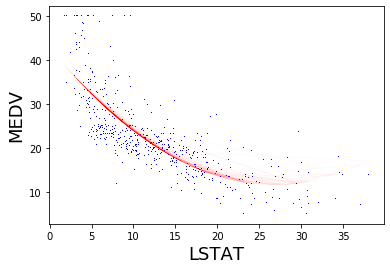

In [11]:
# plotting both variables with small blue dots 
plt.plot(bhp['LSTAT'],bhp['MEDV'], 'b,')
# getting the parameters from the regression line that best fit these pair of coordinates
m, n, c = np.polyfit(bhp['LSTAT'], bhp['MEDV'], 2)
# drawing the regression line in red
plt.plot(bhp['LSTAT'], m*bhp['LSTAT']**2 + n * bhp['LSTAT'] + c, 'r-', linewidth=0.02)
# setting axes labels
plt.xlabel('LSTAT', fontsize=18)
plt.ylabel('MEDV', fontsize=18)
print('m = %.4f; n = %.4f; c = %.4f' %(m,n,c)) # %.4f to show just 4 decimal points

And the function that defines this quadratic correlation is:

$$ MEDV = 0.04\times LSTAT^2 - 2.33\times LSTAT + 42.86$$

And this fact leads me to check the distribution of the population:

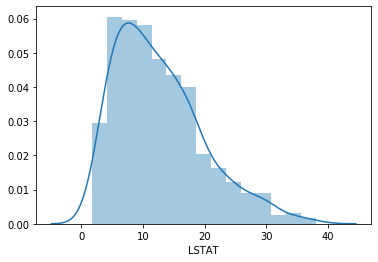

In [12]:
sns.distplot(bhp["LSTAT"]) # Passing the LSTAT column to the distplot() function of seaborn
plt.show()

Most of the occurences gather on the left side, where there is lower percentage of population with lower status. Now let's see the figures:

In [13]:
bhp['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

The 75% of the areas studied have up to a 17% -roughly- of population with lower status

sns.distplot(bhp["CRIM"])
plt.show()
# per capita crime rate by town

sns.distplot(bhp["ZN"])
plt.show()
# NO. Proportion of residential land zoned for lots over 25,000 sq.ft.

sns.distplot(bhp["INDUS"])
plt.show()
# propocion terreno industrial. Distro normal con dos cabezas, tendencia a baja proporcion, ~6%

sns.distplot(bhp["CHAS"])
# Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
plt.show()
bhp['CHAS'].sum()
# hay 35 barrios en la orilla del rio (hay 35 unos)

sns.distplot(bhp["NOX"])
plt.show()
# nitric oxides concentration (parts per 10 million)

sns.distplot(bhp["AGE"])
plt.show()
# proportion of owner-occupied units built prior to 1940

sns.distplot(bhp["DIS"])
plt.show()
#weighted distances to five Boston employment centres

sns.distplot(bhp["RAD"])
plt.show()
# index of accessibility to radial highways

sns.distplot(bhp["TAX"])
plt.show()
# full-value property-tax rate per $10,000

sns.distplot(bhp["PTRATIO"])
plt.show()
# pupil-teacher ratio by town

sns.distplot(bhp["B"])
plt.show()
# 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

It has a bell-like shape typical from the normal distribution. The shape of the left side is smoother but the right one is steeper. And regarding the extremes, the very left side with smaller observations is flat whereas the very right side has an outstanding outsider peak.

In [14]:
# Data exploration
bhp.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


sns.pairplot(bhp, 
                 x_vars=["MEDV"],
                 y_vars=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"], aspect=11.7/8.27)
plt.show()

In turn, __LSTAT__ is also moderately correlated to __INDUS__, __NOX__, __AGE__, __TAX__ and also __RM__ as I explained above. So by checking the correlation coefficient I have chosen the main attributes to consider: the two which are more related to the price (__RM__ and __LSTAT__), which is the target, and the main influencers over these two (__INDUS__, __NOX__, __AGE__, __TAX__), six of them in total.

# Inference

Here I will try to show if there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. For this analysis I am going to create two arrays which hold the values of the price from houses located on the river bank (where column CHAS is 1) and a different array that contains the price of the properties away from it (where column CHAS is 0)

In [15]:
# Creating two arrays which contain the MEDV values from properties on the river bank and away from it:
Bank = []
NotBank = []

# for loop to iterate row after row along the data frame:
for index, row in bhp.iterrows():
    if (row['CHAS'] == 0):
        NotBank.append(row['MEDV'])
    else:
        # CHAS values are either 0 or 1 so this else statement only considers the ones.
        Bank.append(row['MEDV'])
        
ttest = stats.ttest_ind(Bank, NotBank)

print(len(Bank), ' - mean = ', np.mean(Bank), ' - NotBank length = ', len(NotBank), ' - mean = ', np.mean(NotBank))

print(ttest)

35  - mean =  28.439999999999998  - NotBank length =  471  - mean =  22.093842887473464
Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


Then pvalue is 7.4 x 10<sup>-5</sup>, with such low probability I can reject the null hypothesis and consider the medians of the price differ significantly.

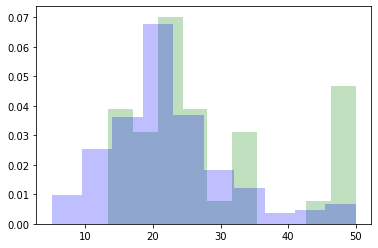

In [16]:
#sns.distplot(Bank)
#sns.distplot(NotBank)

# Plot histograms of the two samples.
plt.hist(Bank, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(NotBank, density=True, color='b', alpha=0.25, label="Sample B")


plt.show()

In [17]:
print(np.var(Bank))
np.var(NotBank)

135.64354285714285


77.8273718564197

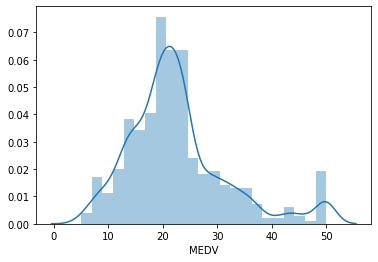

In [18]:
sns.distplot(bhp['MEDV']) 

plt.show()

In [19]:
print('On the river bank',Bank.count(50), 'values out of',len(Bank), 'are 50,', 'whereas away from it, just', NotBank.count(50), 'out of',len(NotBank))

On the river bank 6 values out of 35 are 50, whereas away from it, just 10 out of 471


In [20]:
NotBank.count(50)

10

In [21]:
stats.f_oneway(Bank,NotBank)

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

In [22]:
# sns.distplot(bhp["RM"])
# plt.show()
# # average number of rooms per dwelling

# Prediction

In order to predict the price of a house according to some attributes input I will configure a neural network with keras. 
VARIATIONS: 
- attributes chosen
- test_size=0.3
- number of neuron layers
- number of neuron layers
- activation functions: tanh, relu, 
- loss='mean_squared_error', not many variations possible
- optimizer='sgd'or 'adam'

In [23]:
# Separate the inputs from the rest of the variables.
inputs = bhp[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B']]
outputs = bhp[['MEDV']]
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99
503,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90
504,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90
505,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45


In [24]:
# Split the inputs and outputs into training and test sets. Standard way of training neural network tests. Training network on 70% of the data set and the 30% for testing -test_size=0.3-. Eventually train it on the whole dataset
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.3)
# test_size=0.5, takes half of the data set to train beforehand

In [69]:
# Starting a neural network, sequential for building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 10 neurons and an input layer with 12.
model.add(kr.layers.Dense(units=150, activation='tanh', input_dim=12)) # input_dim=12, the twelve values from dataset.

# Add another hidden layer 
model.add(kr.layers.Dense(units=50, activation='relu')) 
          
# Add a one neuron output layer.
model.add(kr.layers.Dense(units=1, activation='linear')) # Price is the only output I expect

# Build the graph.
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
# loss='categorical_crossentropy' is a standard loss function for a categorical variable.

In [70]:
# Train the neural network.
model.fit(inputs_train, outputs_train, epochs=100, batch_size=2)

Epoch 1/100
354/354 [==============================] - 0s 1ms/step - loss: 639.8176 - accuracy: 0.0000e+00
Epoch 2/100
354/354 [==============================] - 0s 796us/step - loss: 73.1769 - accuracy: 0.0056
Epoch 3/100
354/354 [==============================] - 0s 590us/step - loss: 73.4703 - accuracy: 0.0141
Epoch 4/100
354/354 [==============================] - 0s 718us/step - loss: 73.2614 - accuracy: 0.0169
Epoch 5/100
354/354 [==============================] - 0s 902us/step - loss: 73.4291 - accuracy: 0.0113
Epoch 6/100
354/354 [==============================] - 0s 684us/step - loss: 73.4000 - accuracy: 0.0113
Epoch 7/100
354/354 [==============================] - 0s 975us/step - loss: 73.3853 - accuracy: 0.0113
Epoch 8/100
354/354 [==============================] - 0s 1ms/step - loss: 73.2763 - accuracy: 0.0085
Epoch 9/100
354/354 [==============================] - 0s 847us/step - loss: 73.4249 - accuracy: 0.0113
Epoch 10/100
354/354 [==============================] - 0s 766u

354/354 [==============================] - 0s 777us/step - loss: 73.2902 - accuracy: 0.0141
Epoch 80/100
354/354 [==============================] - 0s 777us/step - loss: 73.3648 - accuracy: 0.0113
Epoch 81/100
354/354 [==============================] - 0s 847us/step - loss: 73.3801 - accuracy: 0.0085
Epoch 82/100
354/354 [==============================] - 0s 992us/step - loss: 73.4509 - accuracy: 0.0085
Epoch 83/100
354/354 [==============================] - 0s 958us/step - loss: 73.2796 - accuracy: 0.0141
Epoch 84/100
354/354 [==============================] - 0s 996us/step - loss: 73.3281 - accuracy: 0.0113
Epoch 85/100
354/354 [==============================] - 0s 997us/step - loss: 72.9989 - accuracy: 0.0113
Epoch 86/100
354/354 [==============================] - 0s 930us/step - loss: 73.4765 - accuracy: 0.0113
Epoch 87/100
354/354 [==============================] - 0s 1ms/step - loss: 73.3075 - accuracy: 0.0113
Epoch 88/100
354/354 [==============================] - 0s 980us/step 

In [71]:
# predictions on the test set
pred1 = model.predict(inputs_test)

In [72]:
# values from the test set
outTest1 = outputs_test.as_matrix().astype(np.float32)

C:\Users\montec3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [73]:
pred1 # all the values are repeated. After several tries only scaling the dataset solved it

array([[22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],
       [22.818924],


In [74]:
# Calculate the loss function, mean squared error in this case. The higher the value output the worse
model.evaluate(inputs_test, outputs_test)

152/152 [==============================] - 0s 316us/step


[110.53140339098479, 0.0]

----
The predictions are not valid since they are all reapeated. In order to improve the efficiency of the neural network I will **scale** it


In [75]:
# Standard scaler from the preprocessing library 
scaler = pre.StandardScaler()
scaler.fit(inputs_train)
inputs_train_scaled = scaler.transform(inputs_train)

In [76]:
# rebuid the neural network
model = kr.models.Sequential()

# Add a hidden layer with 10 neurons and an input layer with 12.
model.add(kr.layers.Dense(units=50, activation='tanh', input_dim=12)) # input_dim=12, the twelve values from dataset.

# Add another hidden layer 
model.add(kr.layers.Dense(units=10, activation='relu')) 
          
# Add a one neuron output layer.
model.add(kr.layers.Dense(units=1, activation='linear'))

# Build the graph.
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
# loss='categorical_crossentropy' is a standard loss function for a categorical variable.

In [82]:
# Train again the neural network.
model.fit(inputs_train_scaled, outputs_train, epochs=15, batch_size=10)

Epoch 1/15
354/354 [==============================] - 0s 242us/step - loss: 18.3957 - accuracy: 0.0254
Epoch 2/15
354/354 [==============================] - 0s 178us/step - loss: 26.2084 - accuracy: 0.0141
Epoch 3/15
354/354 [==============================] - 0s 175us/step - loss: 23.7503 - accuracy: 0.0169
Epoch 4/15
354/354 [==============================] - 0s 165us/step - loss: 19.3091 - accuracy: 0.0169
Epoch 5/15
354/354 [==============================] - 0s 146us/step - loss: 20.6267 - accuracy: 0.0141
Epoch 6/15
354/354 [==============================] - 0s 147us/step - loss: 20.2957 - accuracy: 0.0056
Epoch 7/15
354/354 [==============================] - 0s 133us/step - loss: 18.0286 - accuracy: 0.0198
Epoch 8/15
354/354 [==============================] - 0s 167us/step - loss: 18.5814 - accuracy: 0.0169
Epoch 9/15
354/354 [==============================] - 0s 164us/step - loss: 16.4403 - accuracy: 0.0198
Epoch 10/15
354/354 [==============================] - 0s 139us/step - lo

In [83]:
# Predictions 
pred2 = model.predict(inputs_test).round().T
pred2_1D = pred2[0] # isolating the first element of the 2D array pred2 which contains the predictions so that it can be joined with the array which contains the outputs and can be displayed per pairs for comparison purposes

In [84]:
outTest2 = outputs_test.as_matrix().astype(np.float32)

C:\Users\montec3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [85]:
# show predictions and actual values
print('\u0332'.join('\nPred. vs [Expected]\n')) # '\u0332'.join to underline text
table = '\n'.join('{}       {}'.format(x, y) for x, y in zip(pred2_1D, outTest2))
print(table)


̲P̲r̲e̲d̲.̲ ̲v̲s̲ ̲[̲E̲x̲p̲e̲c̲t̲e̲d̲]̲

18.0       [11.8]
18.0       [24.8]
18.0       [24.6]
18.0       [13.6]
18.0       [16.1]
18.0       [21.5]
21.0       [24.7]
18.0       [20.3]
18.0       [36.2]
18.0       [23.3]
12.0       [9.5]
18.0       [43.5]
9.0       [13.4]
18.0       [14.3]
16.0       [13.]
18.0       [16.6]
21.0       [22.6]
16.0       [50.]
18.0       [24.]
18.0       [50.]
18.0       [17.8]
16.0       [17.4]
21.0       [20.]
18.0       [36.5]
18.0       [41.7]
18.0       [45.4]
17.0       [28.5]
16.0       [50.]
18.0       [31.5]
21.0       [26.6]
18.0       [50.]
18.0       [15.6]
18.0       [19.5]
18.0       [48.8]
9.0       [17.9]
18.0       [50.]
18.0       [18.2]
18.0       [21.6]
21.0       [20.7]
18.0       [22.9]
16.0       [10.2]
18.0       [46.]
18.0       [16.]
18.0       [19.4]
16.0       [25.]
18.0       [29.4]
18.0       [37.9]
18.0       [20.3]
18.0       [50.]
18.0       [19.6]
11.0       [11.8]
17.0       [20.6]
16.0       [23.2]
18.0       [32.7]
1

In [86]:
# Evaluating the network again
model.evaluate(inputs_test, outputs_test)

152/152 [==============================] - 0s 85us/step


[143.59766829641242, 0.0]